In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
import re
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
df = pd.read_csv('/Users/calvi/Downloads/lpool stats.csv')

In [3]:
df.dtypes

index       int64
Player     object
Team       object
Apps      float64
Min       float64
G         float64
A         float64
xG         object
xA         object
xG90      float64
xA90      float64
dtype: object

In [4]:
#clearing everything uneccessary for xGA xG after +-
def clean_numeric(s):
    return re.sub(r'([+-]?\d+\.\d+)([+-]?\d+\.\d+)?(?=[+-]|\b)', lambda x: x.group(1), s)
columns_to_clean = ['xG', 'xA']
df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.map(clean_numeric))
print(df)

    index                  Player       Team  Apps     Min     G    A     xG  \
0       1           Mohamed Salah  Liverpool  20.0  1768.0  14.0  8.0  13.61   
1      33              Diogo Jota  Liverpool  14.0   678.0   5.0  1.0   3.93   
2      37            Darwin Núñez  Liverpool  19.0  1118.0   5.0  6.0  11.13   
3      70               Luis Díaz  Liverpool  19.0  1191.0   3.0  1.0   3.84   
4      74              Cody Gakpo  Liverpool  18.0   815.0   3.0  1.0   3.98   
5      86  Trent Alexander-Arnold  Liverpool  18.0  1508.0   2.0  3.0   1.90   
6     114      Dominik Szoboszlai  Liverpool  20.0  1621.0   2.0  2.0   1.56   
7     136         Virgil van Dijk  Liverpool  18.0  1557.0   1.0  2.0   2.02   
8     142        Andrew Robertson  Liverpool   8.0   720.0   1.0  0.0   0.55   
9     161            Curtis Jones  Liverpool  12.0   567.0   1.0  1.0   1.55   
10    182          Harvey Elliott  Liverpool  16.0   351.0   1.0  1.0   0.55   
11    190     Alexis Mac Allister  Liver

In [6]:
# Convert columns to numeric types
df["xG90"] = pd.to_numeric(df["xG90"], errors='coerce')
df["xA90"] = pd.to_numeric(df["xA90"], errors='coerce')
df["xA"] = pd.to_numeric(df["xA"], errors='coerce')
df["xG"] = pd.to_numeric(df["xG"], errors='coerce')

In [7]:
# Set up the colors
# Use Coolors to get the color hex codes: https://coolors.co/?ref=65623355a0453d000b8a2708
bg_color = "#FFFFFF" # I usually just like to do a white background
text_color = "#000000" # With black text

row_colors = {
    "top4": "#E1FABC",
    "top6": "#FFFC97",
    "bottom6": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [9]:
df = df.drop('index', axis=1)

In [26]:
col_defs = [
    ColumnDefinition(
        name="Player",
        textprops={"ha": "center"},
        width=0.75,
    ),
    ColumnDefinition(
        name="Team",
        textprops={"ha": "left", "weight": "bold"},
        width=.5,
    ),
    ColumnDefinition(
        name="Apps",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Min",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="G",
        group="Stats",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="A",
        group="Stats",
        textprops={"ha": "center"},
        width=0.5,
        ),
    ColumnDefinition(
        name="xG90",
        group="Expected Stats",
        width=0.5,
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xG90"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xA90",
        group="Expected Stats",
        width=0.5,
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xA90"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xA",
        group="Expected Stats",
        width=0.5,
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xA"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Stats",
        width=0.5,
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(df["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]

/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_21459/992128841.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


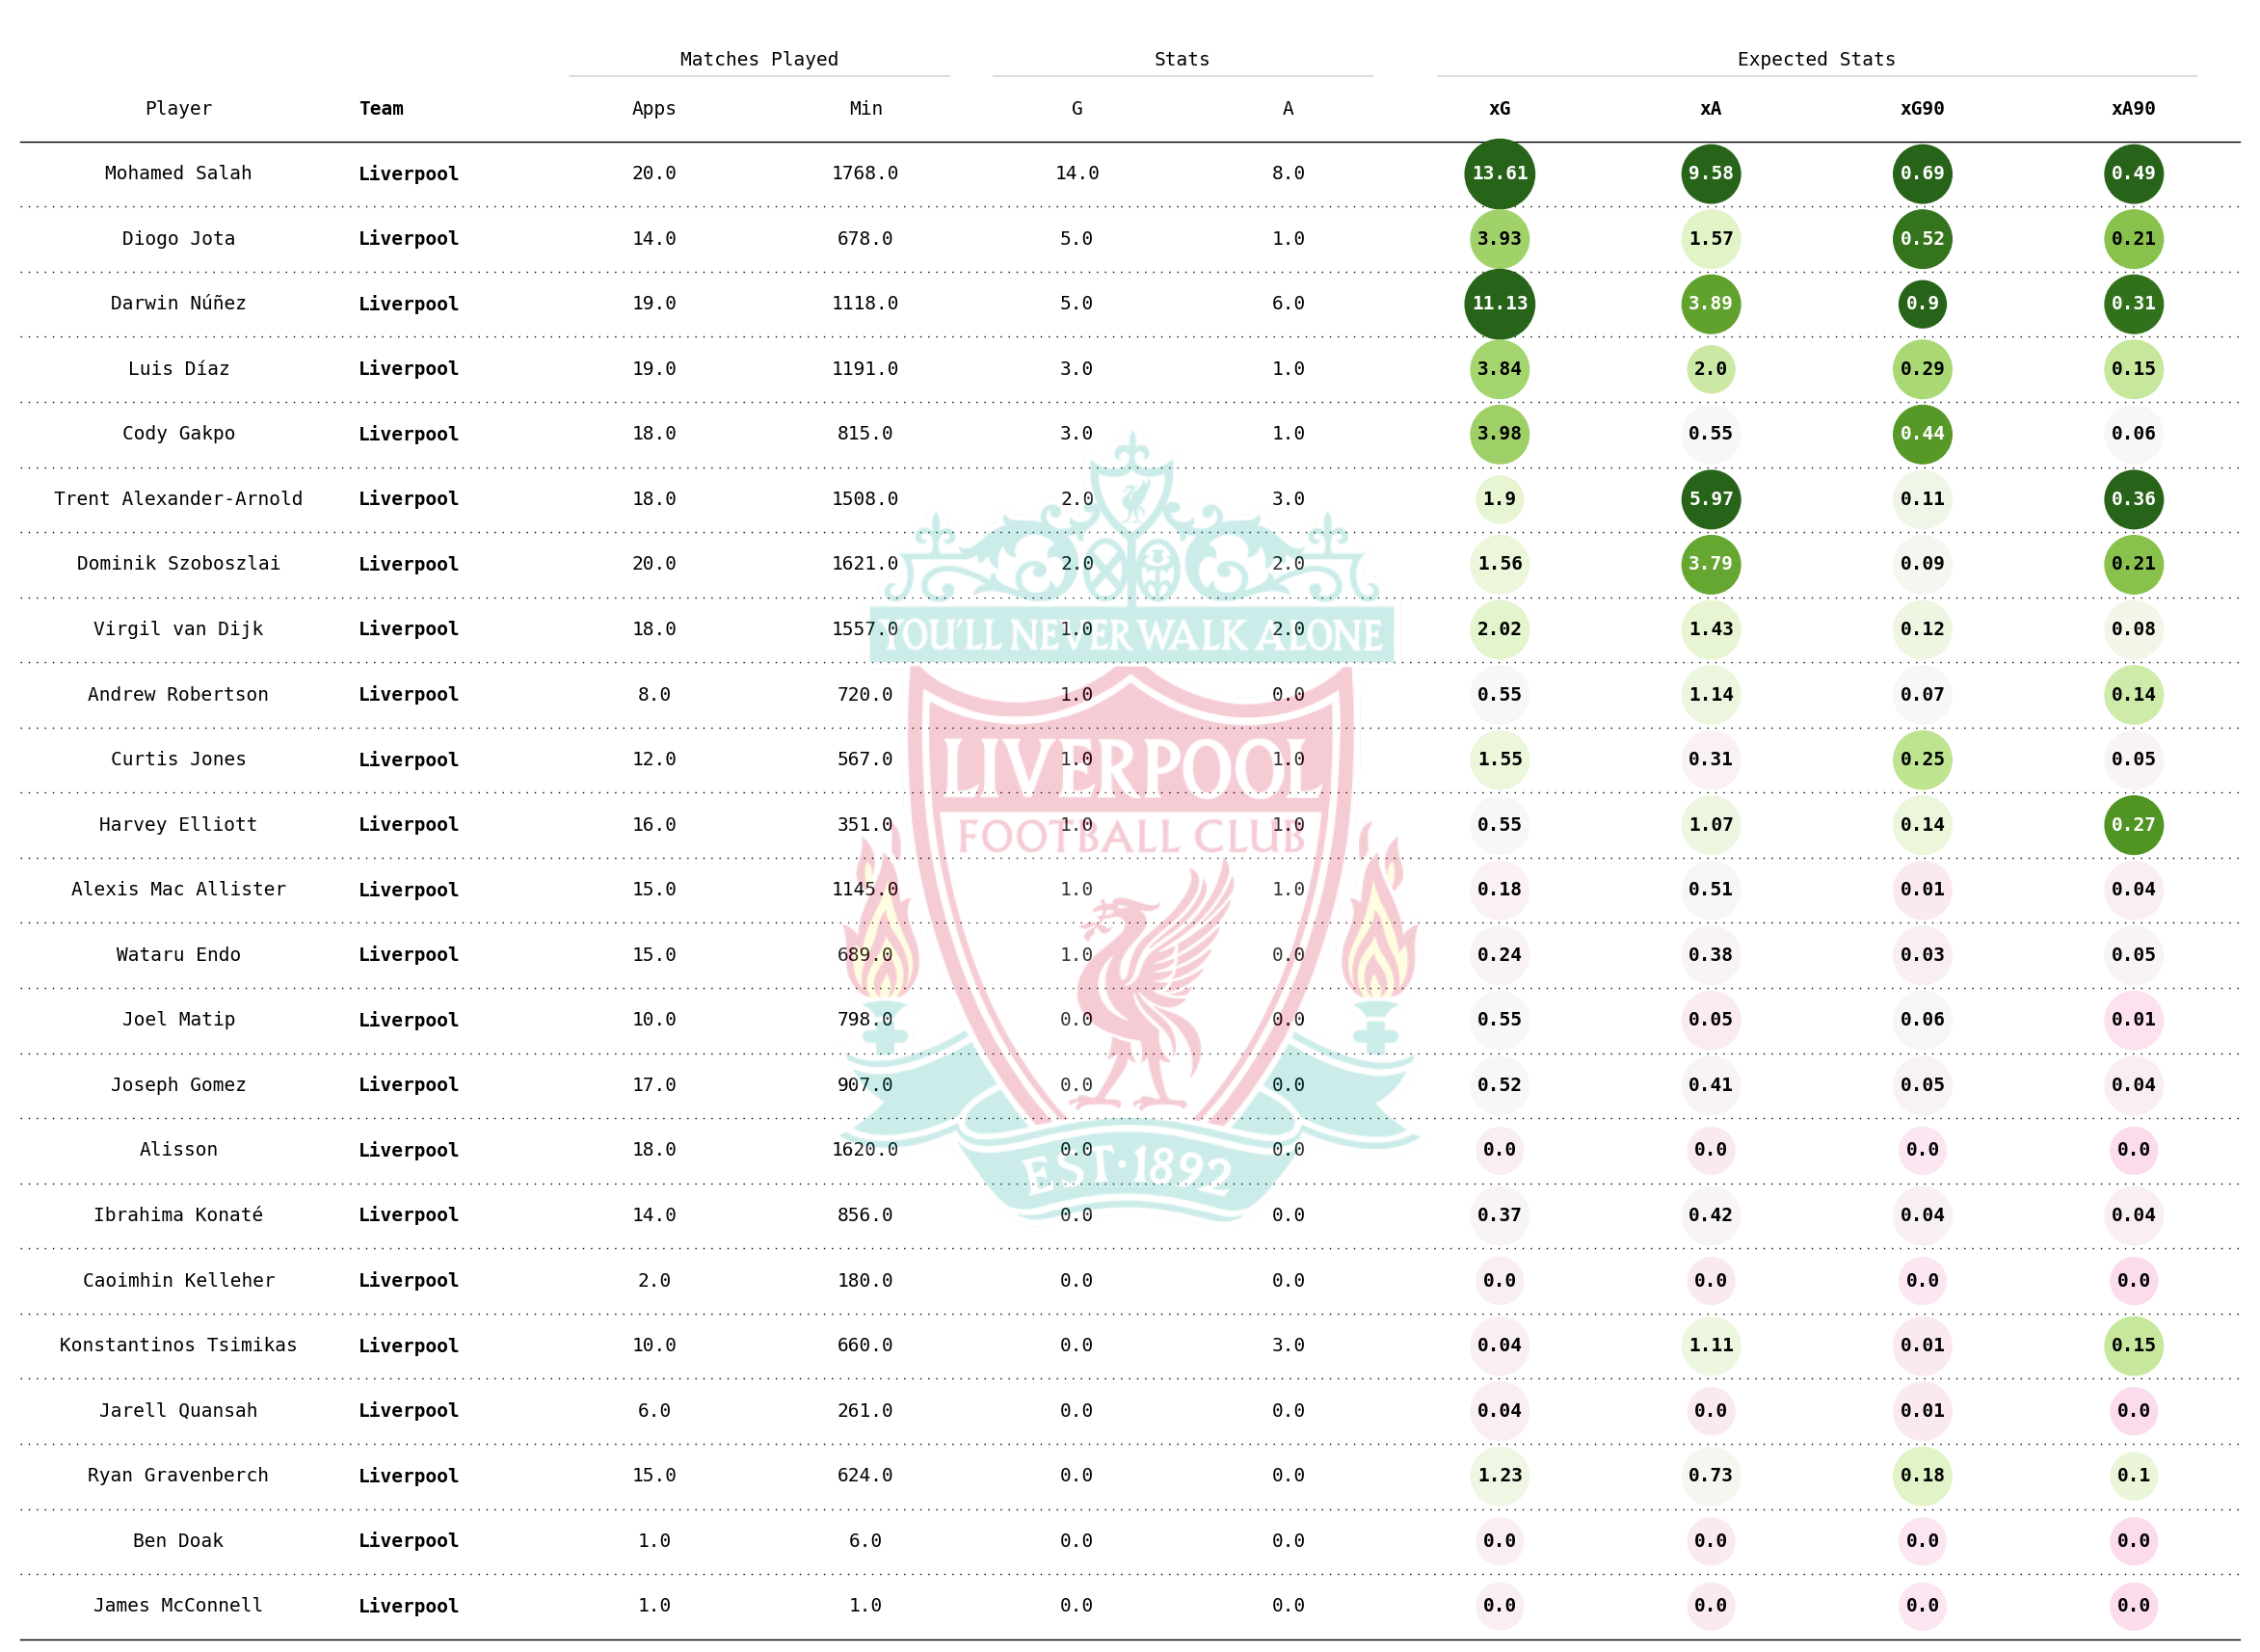

In [27]:
# Ok lets actually create the table
fig, ax = plt.subplots(figsize=(30, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df,
    column_definitions=col_defs,
    index_col="Player",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xA", "xG90","xA90"]) # This will set the font color of the columns based on the cmap so the text is readable

# Here we can add colors to the rows
# I personally don't like the look of this, but it's an option

#for idx in [0, 1, 2, 3]:
    #table.rows[idx].set_facecolor(row_colors["top4"])

#for idx in [4, 5, 6, 7]:
    #table.rows[idx].set_facecolor(row_colors["top6"])
#
#
#for idx in [27, 28, 29]:
    #table.rows[idx].set_facecolor(row_colors["bottom6"])
#table.cells[10, 3].textprops["color"] = "#8ACB88"
logo_path = '/Users/calvi/Downloads/team_logos/liverpool_logo.png'  # Replace with the path to your logo image
logo = plt.imread(logo_path)
imagebox = OffsetImage(logo, zoom=1, alpha=0.2)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction', boxcoords="axes fraction", frameon=False)
ax.add_artist(ab)


fig.show()